In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import signal
import os

In [114]:
os.listdir( 'APD_stuff/24_04_power_TRPL_run/')

['Histogram_2023-03-24_184502.txt',
 'Histogram_2023-03-24_184548.txt',
 'Histogram_2023-03-24_184627.txt',
 'Histogram_2023-03-24_184711.txt',
 'Histogram_2023-03-24_184741.txt',
 'Histogram_2023-03-24_184811.txt',
 'Histogram_2023-03-24_184839.txt',
 'Histogram_2023-03-24_184909.txt',
 'Histogram_2023-03-24_184943.txt',
 'Histogram_2023-03-24_185106.txt',
 'Histogram_2023-03-24_185141.txt',
 'Histogram_2023-03-24_185221.txt',
 'Histogram_2023-03-24_185251.txt',
 'Histogram_2023-03-24_185329.txt',
 'Histogram_2023-03-24_185403.txt',
 'Histogram_2023-03-24_185440.txt']

In [13]:
def expo(x,a,T,c):
    return a*np.exp((x)*(-1/T))+c

In [14]:
def double_exp(t, a1, t1, a2, t2,c):
    return a1*np.exp(-t/t1) + a2*np.exp(-t/t2) + c

In [174]:
def d_expo_conv(x,a1,a2,t1,t2,c):
    ex = double_exp(x,a1,t1,a2,t2,0)
    o = signal.convolve(ex,IRF_counts_use)+c
    return o[:len(x)]

In [311]:
def d_expo_conv_2(x,a1,a2,t1,t2,c):
    ex = expo_conv(x,a1,t1,0)
    o = ex + expo(x,a2,t2,0)+c
    return o[:len(x)]

In [171]:
def t_expo_conv(x,a1,a2,a3,t1,t2,t3,c):
    ex = expo_conv(x,a1,t1,0)
    o = ex + expo(x,a2,t2,0) + expo(x,a3,t3,0) + c
    return o[:len(x)]

In [170]:
def expo_conv(x,a,T,c):
    ex = expo(x,a,T,0)
    o = signal.convolve(ex,IRF_counts_use) +c
    return o[:len(x)]

In [115]:
#folder = 'Data/PerovskiteQD/2022_11_08 (narrow br3)-20221114T161242Z-001/2022_11_08 (narrow br3)/TRPL_08_11/'
#IRF_folder = 'Data/PerovskiteQD/2022_11_08 (narrow br3)-20221114T161242Z-001/2022_11_08 (narrow br3)/TRPL_08_11/'
folder = 'APD_stuff/24_04_power_TRPL_run/'
IRF_folder = 'APD_stuff/16_03_trpl/'
file = os.listdir(folder)[0] #anything but 2
IRF_file = os.listdir(IRF_folder)[-2] # always 2

In [6]:
folder+file

'APD_stuff/16_03_trpl/Histogram_2023-03-16_145129.txt'

In [7]:
df = pd.read_csv(folder+file, delim_whitespace=True)
df_IRF = pd.read_csv(IRF_folder+IRF_file, delim_whitespace=True)

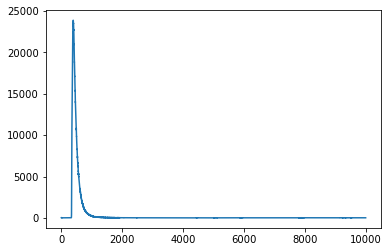

In [9]:
plt.plot(df.iloc[:,1])

In [422]:
os.listdir()

['BG_529nm_60s.dat',
 'BG_529nm_60s.phu',
 'IRF_450nm_60s.dat',
 'IRF_450nm_60s.phu',
 'PL_527nm_100uW_60s.dat',
 'PL_527nm_100uW_60s.phu',
 'PL_529nm_100uW_60s.dat',
 'PL_529nm_100uW_60s.phu',
 'PL_529nm_60s_with laser.dat',
 'PL_529nm_60s_with laser.phu',
 'PL_531nm_100uW_60s.dat',
 'PL_531nm_100uW_60s.phu',
 'PL_532nm_100uW_60s.dat',
 'PL_532nm_100uW_60s.phu']

In [429]:

file = os.listdir()[4] #anything but 2
IRF_file = os.listdir()[2]

(0.0, 50.0)

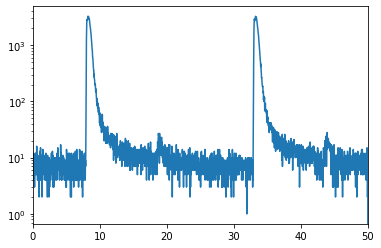

In [575]:

df = pd.read_csv(file, delim_whitespace=True, comment='#')
df = df.iloc[3:].reset_index(drop=True)
df.columns = ['counts']
df['times (ns)'] = df.index*0.025
t = df.iloc[:,1]
counts = df.iloc[:,0]
plt.semilogy(t,c)
plt.xlim(0,50)

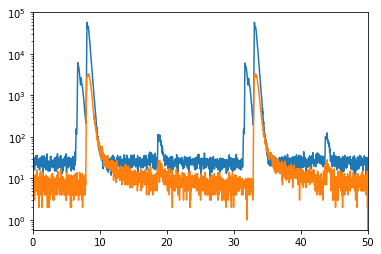

In [584]:
df_IRF = pd.read_csv(IRF_file, delim_whitespace=True, comment='#')
df_IRF = df_IRF[3:].reset_index(drop=True)
df_IRF.columns = ['counts']
df_IRF['times (ns)'] = df_IRF.index*0.025
t_IRF = df_IRF.iloc[:,1]
IRF_counts = df_IRF.iloc[:,0]
plt.xlim(0,50)
plt.semilogy(t,IRF_counts)
plt.semilogy(t,c)

In [113]:
os.listdir( 'APD_stuff/24_04_power_TRPL_run/')

['Histogram_2023-03-24_184502.txt',
 'Histogram_2023-03-24_184548.txt',
 'Histogram_2023-03-24_184627.txt',
 'Histogram_2023-03-24_184711.txt',
 'Histogram_2023-03-24_184741.txt',
 'Histogram_2023-03-24_184811.txt',
 'Histogram_2023-03-24_184839.txt',
 'Histogram_2023-03-24_184909.txt',
 'Histogram_2023-03-24_184943.txt',
 'Histogram_2023-03-24_185106.txt',
 'Histogram_2023-03-24_185141.txt',
 'Histogram_2023-03-24_185221.txt',
 'Histogram_2023-03-24_185251.txt',
 'Histogram_2023-03-24_185329.txt',
 'Histogram_2023-03-24_185403.txt',
 'Histogram_2023-03-24_185440.txt']

In [583]:
i = 0

Histogram_2023-03-24_184839.txt


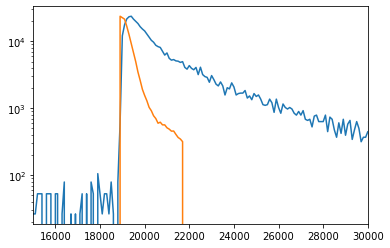

In [590]:
file = os.listdir(folder)[i] #anything but 2
IRF_file = os.listdir(IRF_folder)[-2]
df = pd.read_csv(folder+file, delim_whitespace=True)
df_IRF = pd.read_csv(IRF_folder+IRF_file, delim_whitespace=True)
counts = df.iloc[:,1]
t = df.iloc[:,0]
IRF_counts = df_IRF.iloc[:,1]
IRF_counts = IRF_counts[::10].reset_index(drop=True)
peak = IRF_counts[IRF_counts>300]
rat = max(IRF_counts)/max(counts)
num = counts[counts>(300/rat)].index.min()
top = max(counts)
peak = np.array(peak)
peak
before = num
after = 1000-len(peak)-before
IRF_counts = np.concatenate((np.zeros(before),peak,np.zeros(after)))
plt.semilogy(t,counts*rat)
print(file)
plt.semilogy(t,IRF_counts)
#plt.semilogy(0,40000)
plt.xlim(15000,30000)
i+=1

In [594]:
double_fit = False


In [595]:

#t = df.iloc[:,0]
#counts = df.iloc[:,1]
off = t[counts.idxmax()]
t_use = t-off
plt.figure(figsize=(4,2))
#IRF_counts = df_IRF.iloc[:,1]
#IRF_counts  = new
xmin = -2000
xmax = 15000
mask = (t_use<xmax)&(t_use>xmin)
t_fit = t_use[mask]
c_fit = counts[mask]
IRF_counts_use = IRF_counts[mask]/max(IRF_counts)

if double_fit==True:
    p0 = [2,1000,300,3000,4]
    #p0 = [0.1,100,100,0.2,0.5,5] 
    params, unc = curve_fit(d_expo_conv_2, t_fit, c_fit, p0=p0,sigma=np.sqrt(c_fit))
    #para = [0.1,0.5,0.23,2,0.5]
    plt.semilogy(t_use, counts,'o', label='sig',alpha=0.1,color='red')
    plt.semilogy(t_fit,d_expo_conv_2(t_fit,*params),label='fit',linewidth=2)
else:
    p0 = [10,1000,0]
    params, unc = curve_fit(expo_conv, t_fit, c_fit, p0=p0,sigma=np.sqrt(c_fit))
    plt.semilogy(t_use, counts,'o', label='sig',alpha=0.1,color='red')
    plt.semilogy(t_fit,expo_conv(t_fit,*params),label='fit',linewidth=2)
    

#plt.semilogy(t_use, IRF_counts,label='IRF')

plt.xlim(-1000,15000)
plt.ylim(1,max(counts)+1000)

plt.xlabel('Time(ps)')
plt.ylabel('Time Resolved PL (a.u)')
plt.legend()

print(params)
uncs = np.sqrt(np.diag(unc))
print(uncs)
print(file)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

<Figure size 288x144 with 0 Axes>

In [ ]:
plt.semilogy(t_use,IRF_counts)
plt.semilogy(t_use, counts)
plt.xlim(-7000,40000)

In [211]:
counts

0      0
1      1
2      2
3      1
4      2
      ..
995    1
996    0
997    0
998    0
999    0
Name: Counts per bin, Length: 1000, dtype: int64

In [492]:
IRF_counts[0:mini-4] = 20
mini = IRF_counts[IRF_counts>10000].index.min()
plt.plot(IRF_counts[mini-4:mini+100])


NameError: name 'mini' is not defined

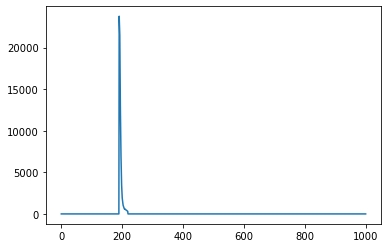

In [493]:
plt.plot(IRF_counts)

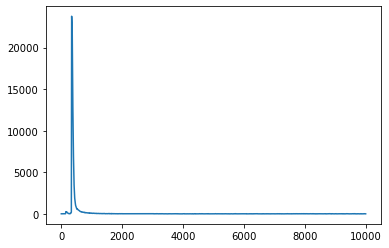

In [110]:
IRF_short = IRF_counts[::10]
plt.plot(IRF_short)

In [111]:
IRF_short

0       26
10      30
20      24
30      27
40      27
        ..
9950    30
9960    17
9970    26
9980    26
9990    22
Name: Counts per bin, Length: 1000, dtype: int64

In [119]:
IRF_counts = df_IRF.iloc[:,1]
IRF_counts = IRF_counts[::10]

In [120]:
IRF_counts

0       26
10      30
20      24
30      27
40      27
        ..
9950    30
9960    17
9970    26
9980    26
9990    22
Name: Counts per bin, Length: 1000, dtype: int64